# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [5]:
print('Consist NaN values:', data.isna().any().any())

Consist NaN values: True


In [6]:
data.fillna('', inplace= True)
print('Consist NaN values:', data.isna().any().any())

Consist NaN values: False


In [7]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?
2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

C:\Users\nikita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    3024
1    2305
Name: target, dtype: int64

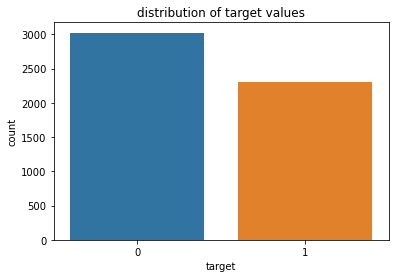

In [8]:
sns.countplot(train['target']).set(title='distribution of target values')
train['target'].value_counts()
# Класс 0 содержит на 719 больше объектов на обучающей выборке, чем 1 класс. Выборка относительно сбалансированная, так как
# 1 класс составляет ~43% процента всех объектов, что является приемлимой частью всего датасета.

In [9]:
popular_tags = np.array(train['keyword'].value_counts().index)

print("10 most popular tags:", popular_tags[:10], "\n",
      "keyword '' quantity of values:", train['keyword'].value_counts()[0], "\n",
     "10 most poplar tags (w/o '' value)", popular_tags[1:11], sep='')

print("'' quantity of values:", train['keyword'].value_counts()[0])

frequency_of_tags = train.loc[train['keyword'].isin(popular_tags[1:11])]
frequency_of_tags['keyword'].value_counts()
print("\n", "Frequency of 10 most popualr tags: ", "\n",
     frequency_of_tags['keyword'].value_counts(), sep='')

10 most popular tags:['' 'damage' 'siren' 'wreckage' 'fatalities' 'deluge' 'refugees' 'derail'
 'fear' 'tsunami']
keyword '' quantity of values:44
10 most poplar tags (w/o '' value)['damage' 'siren' 'wreckage' 'fatalities' 'deluge' 'refugees' 'derail'
 'fear' 'tsunami' 'fatality']
'' quantity of values: 44

Frequency of 10 most popualr tags: 
damage        36
siren         35
wreckage      34
fatalities    33
deluge        31
derail        30
fatality      30
tsunami       30
fear          30
refugees      30
Name: keyword, dtype: int64


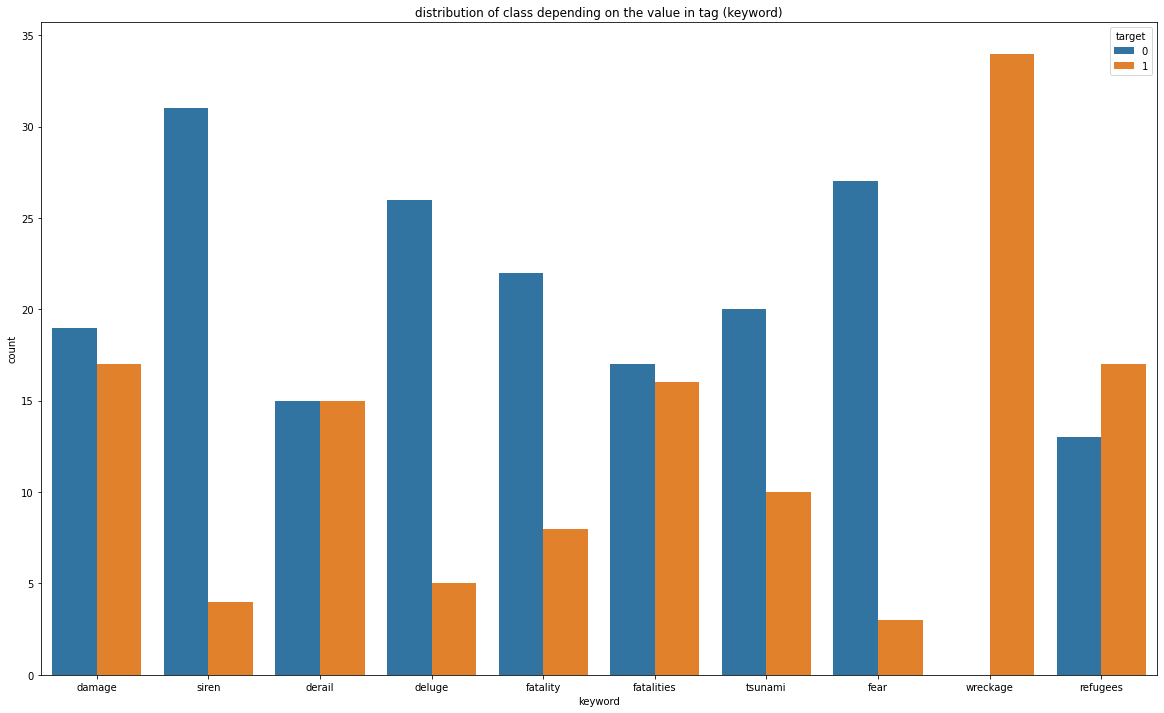

In [10]:
plt.figure(figsize=(20, 12))
sns.countplot(data=frequency_of_tags, x='keyword', hue='target').set(title='distribution of class depending on the value in tag (keyword)')
plt.show()
# Видно из графика, что сообщения с ключевым словом "wreckage" во всех случаях (на обучающей выборке) соответствовали сообщениям,
# содержащим информацию о катастрофе (класс 1), в то время как сообщения с ключевыми словами "siren", "harm",
# "deluge", "fatality" в большинстве случаев не соответствовали сообщениям, содержащим информацию о катастрофе. 
# Остальные слова из списка десяти самых встречающихся ключевых слов (без значения '') скорее соответсвовали сообщениям со сторонней информацией (класс 0), 
# чем сообщениям с информацией о катастрофе, за исключением слова "refugees", оно в примерно одинаковой пропорции относилась и к 1, и к 0 классу.

### Полная выборка

In [11]:
popular_tags_whole_data = np.array(data['keyword'].value_counts().index)

print("10 most popular tags:", popular_tags_whole_data[:10], "\n",
      "keyword '' quantity of values:", data['keyword'].value_counts()[0], "\n",
     "10 most poplar tags (w/o '' value)", popular_tags_whole_data[1:11], sep='')

print("'' quantity of values:", data['keyword'].value_counts()[0])

frequency_of_tags_whole_data = data.loc[data['keyword'].isin(popular_tags_whole_data[1:11])]
frequency_of_tags_whole_data['keyword'].value_counts()

10 most popular tags:['' 'fatalities' 'deluge' 'armageddon' 'sinking' 'damage' 'harm'
 'body%20bags' 'evacuate' 'fear']
keyword '' quantity of values:61
10 most poplar tags (w/o '' value)['fatalities' 'deluge' 'armageddon' 'sinking' 'damage' 'harm'
 'body%20bags' 'evacuate' 'fear' 'outbreak']
'' quantity of values: 61


fatalities     45
armageddon     42
deluge         42
body%20bags    41
damage         41
harm           41
sinking        41
evacuate       40
fear           40
outbreak       40
Name: keyword, dtype: int64

[Text(0.5, 1.0, 'distribution of class depending on the value in tag (keyword)')]

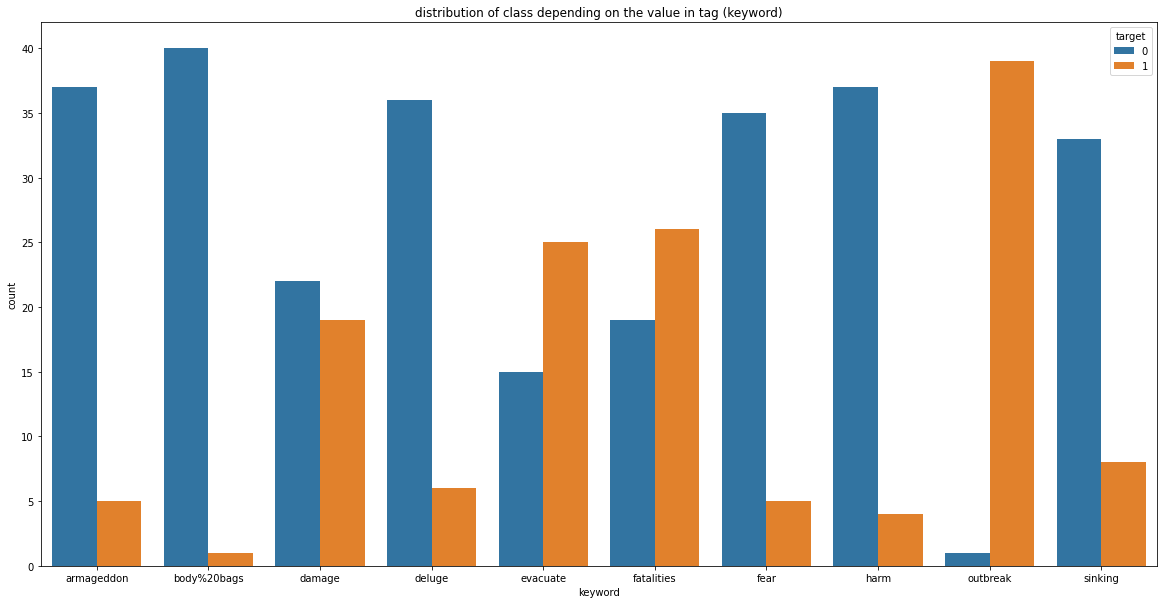

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(data=frequency_of_tags_whole_data, x='keyword', hue='target').set(title='distribution of class depending on the value in tag (keyword)') 

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [13]:
data.drop('id', inplace=True, axis=1)
data

,keyword,location,text,target
0,,,Our Deeds are the Reason of this #earthquake M...,1
1,,,Forest fire near La Ronge Sask. Canada,1
2,,,All residents asked to 'shelter in place' are ...,1
3,,,"13,000 people receive #wildfires evacuation or...",1
4,,,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
7608,,,Two giant cranes holding a bridge collapse int...,1
7609,,,@aria_ahrary @TheTawniest The out of control w...,1
7610,,,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,,,Police investigating after an e-bike collided ...,1


In [14]:
data['full info'] = data['keyword' ]+ data['location'] + data['text']

In [15]:
data

,keyword,location,text,target,full info
0,,,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...
1,,,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada
2,,,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...
3,,,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or..."
4,,,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...
...,...,...,...,...,...
7608,,,Two giant cranes holding a bridge collapse int...,1,Two giant cranes holding a bridge collapse int...
7609,,,@aria_ahrary @TheTawniest The out of control w...,1,@aria_ahrary @TheTawniest The out of control w...
7610,,,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611,,,Police investigating after an e-bike collided ...,1,Police investigating after an e-bike collided ...


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [16]:
# Для того, чтобы тест и трейн переняли все свойства преобразованной даты.
train, test = train_test_split(data, test_size=0.3, random_state=42)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(train['full info'])

In [19]:
x_train = pd.DataFrame(bow.toarray(), columns=vectorizer.get_feature_names_out())
x_train

,00,000,0000,00cy9vxeff,00end,00pm,01,011072,014213aannnnd,02,...,ûïthe,ûïwe,ûïwhen,ûïyou,ûò,ûò800000,ûó,ûóher,ûókody,ûótech
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [20]:
len(list(vectorizer.vocabulary_.items()))

22738

In [21]:
import re
from string import punctuation
def info(vocabulary):
#     vocabulary = str(vocabulary)
    dictionary = dict()
    dictionary["Number of elements, which consist digits"] = 0
    dictionary["Number of elements, which consist symbols"] = 0
    dictionary["Number of elements, which consist #"] = 0
    dictionary["Number of elements, which consist @"] = 0
    
    for element in vocabulary:
        if any(character.isdigit() for character in element):
            dictionary['Number of elements, which consist digits'] += 1
        if any(symbol in element for symbol in punctuation):
            dictionary['Number of elements, which consist symbols'] +=1
        if (element[0] == '#'):
            dictionary['Number of elements, which consist #'] +=1
        if (element[0] == '@'):
            dictionary['Number of elements, which consist @'] += 1
    
    
    print(dictionary)
vectorizer_vocabulary = vectorizer.vocabulary_
info(vectorizer_vocabulary)

{'Number of elements, which consist digits': 4590, 'Number of elements, which consist symbols': 317, 'Number of elements, which consist #': 0, 'Number of elements, which consist @': 0}


## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [22]:
from nltk.tokenize import TweetTokenizer
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer

In [23]:
tweet_tokenizer = TweetTokenizer()
tweet_vectorizer = CountVectorizer(tokenizer=tweet_tokenizer.tokenize)
tweet_bow = tweet_vectorizer.fit_transform(train['full info'])

In [24]:
tweet_train = pd.DataFrame(tweet_bow.toarray(), columns=tweet_vectorizer.get_feature_names_out())
tweet_train

,!,#,##youtube,#034,#039,#06,#09,#1-1st,#1008pla,#140,...,ûïthe,ûïwe,ûïwhen,ûïyou,ûò,ûò800000,ûó,ûóher,ûókody,ûótech
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
tweet_vectorizer_vocabulary = tweet_vectorizer.vocabulary_
info(tweet_vectorizer_vocabulary)

{'Number of elements, which consist digits': 4609, 'Number of elements, which consist symbols': 7573, 'Number of elements, which consist #': 1474, 'Number of elements, which consist @': 1678}


## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [43]:
import nltk
def custom_tokenizer(data: str):
    data = data.lower()
    tknzr = TweetTokenizer()
    snowball_stemmer = nltk.stem.SnowballStemmer(language='english')
    
    banned_words = set(nltk.corpus.stopwords.words('english'))
    tokens = tknzr.tokenize(data)
    legit = []
    
    for element in tokens:
        if (re.fullmatch('[a-z]+', element) is not None and element not in banned_words):
                legit.append(element)
    
        elif ((re.fullmatch(f'[{punctuation}]+', element) is not None) and (re.search('[()]', element) is not None) \
              and element not in banned_words):
                legit.append(element)
    
        elif (re.fullmatch('#[a-z]+', element) is not None and element not in banned_words):
                legit.append(element)
    
    result = [snowball_stemmer.stem(value) for value in legit]
    return result

In [51]:
print(custom_tokenizer(train['full info'][:11].to_string()))
train[:11]

['bridg', 'australia', 'col', 'hailcarol', 'stream', 'illinoisgreat', 'michigan', 'techn', 'policehouston', 'cnn', 'tennesse', 'movi', 'theater', 'sho', 'riotingstil', 'riot', 'coupl', 'hour', 'left', 'woundslak', 'highlandscrack', 'path', 'airplan', 'thereexpert', 'bloodyisol', 'citi', 'world', 'came', 'k', 'burn', 'except', 'idk', 'r', 'destroyh', '(', 'ask', ')', 'destroy', 'hous', 'woundedmaracay', 'nirgua', 'venezuelapolic', 'offic', 'wreck', 'current', 'write', 'book', 'friggin']


,keyword,location,text,target,full info
1186,bridge%20collapse,,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,bridge%20collapseAshes 2015: AustraliaÛªs col...
4071,hail,"Carol Stream, Illinois",GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @...,1,"hailCarol Stream, IllinoisGREAT MICHIGAN TECHN..."
5461,police,Houston,CNN: Tennessee movie theater shooting suspect ...,1,policeHouston CNN: Tennessee movie theater sho...
5787,rioting,,Still rioting in a couple of hours left until ...,1,riotingStill rioting in a couple of hours left...
7445,wounds,Lake Highlands,Crack in the path where I wiped out this morni...,0,woundsLake HighlandsCrack in the path where I ...
151,airplane%20accident,Somewhere Out There,Experts in France begin examining airplane deb...,1,airplane%20accidentSomewhere Out ThereExperts ...
915,bloody,Isolated City In World Perth,'I came to kill Indians...for FUN': Video of s...,1,bloodyIsolated City In World Perth'I came to k...
1305,burning,,@JohnsonTionne except idk them?? it's really b...,0,burning@JohnsonTionne except idk them?? it's r...
2570,destroy,he/him or she/her (ask),destroy the house,0,destroyhe/him or she/her (ask)destroy the house
7399,wounded,"Maracay y Nirgua, Venezuela",Police Officer Wounded Suspect Dead After Exch...,1,"woundedMaracay y Nirgua, VenezuelaPolice Offic..."


## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.
2. Обучите LogisticRegression на полученных признаках.
3. Посчитайте метрику f1-score на тестовых данных.

In [131]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data['full info'], data['target'], random_state=2002) 

In [132]:
import sklearn
from sklearn.preprocessing import MaxAbsScaler
vectorizer_w_custom = CountVectorizer(tokenizer=custom_tokenizer)
tweet_bow = vectorizer_w_custom.fit_transform(x_train)
tweet_bow_test = vectorizer_w_custom.transform(x_test)

scaler = MaxAbsScaler()
tweet_bow = scaler.fit_transform(tweet_bow)
tweet_bow_test = scaler.transform(tweet_bow_test)

classifier = sklearn.linear_model.LogisticRegression(max_iter = 330, random_state=2002)
classifier.fit(tweet_bow, y_train)
predictions = classifier.predict(tweet_bow_test)

In [133]:
print(sklearn.metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83      1101
           1       0.80      0.66      0.72       803

    accuracy                           0.79      1904
   macro avg       0.79      0.77      0.77      1904
weighted avg       0.79      0.79      0.78      1904



## Задание 9 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество?
2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?
3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [134]:
tf_idf_w_custom = sklearn.feature_extraction.text.TfidfVectorizer(tokenizer=custom_tokenizer)
tf_idf_tweet_bow = tf_idf_w_custom.fit_transform(x_train)
tf_idf_tweet_bow_test = tf_idf_w_custom.transform(x_test)

scaler = MaxAbsScaler()
tf_idf_tweet_bow = scaler.fit_transform(tf_idf_tweet_bow)
tf_idf_tweet_bow_test = scaler.transform(tf_idf_tweet_bow_test)

second_classifier = sklearn.linear_model.LogisticRegression(max_iter = 330, random_state=2002)
second_classifier.fit(tf_idf_tweet_bow, y_train)
second_predictions = second_classifier.predict(tf_idf_tweet_bow_test)

In [135]:
print(sklearn.metrics.classification_report(y_test, second_predictions))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1101
           1       0.78      0.70      0.73       803

    accuracy                           0.79      1904
   macro avg       0.79      0.78      0.78      1904
weighted avg       0.79      0.79      0.79      1904



In [136]:
new_matrix = pd.DataFrame(tf_idf_tweet_bow.toarray(), columns=tf_idf_w_custom.get_feature_names_out())
new_matrix

,#abandon,#abbott,#abc,#abcnew,#abha,#ableg,#abomb,#abstorm,#accid,#acenewsdesk,...,zombi,zone,zonewolf,zoom,zouma,zrnf,zss,zumiez,zurich,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## WITH .9 MAX_DF

In [137]:
tf_idf_w_custom = sklearn.feature_extraction.text.TfidfVectorizer(tokenizer=custom_tokenizer , max_df=.9)
tf_idf_tweet_bow = tf_idf_w_custom.fit_transform(x_train)
tf_idf_tweet_bow_test = tf_idf_w_custom.transform(x_test)

scaler = MaxAbsScaler()
tf_idf_tweet_bow = scaler.fit_transform(tf_idf_tweet_bow)
tf_idf_tweet_bow_test = scaler.transform(tf_idf_tweet_bow_test)

second_classifier = sklearn.linear_model.LogisticRegression(max_iter = 330, random_state=2002)
second_classifier.fit(tf_idf_tweet_bow, y_train)
second_predictions = second_classifier.predict(tf_idf_tweet_bow_test)

In [138]:
print(sklearn.metrics.classification_report(y_test, second_predictions))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1101
           1       0.78      0.70      0.73       803

    accuracy                           0.79      1904
   macro avg       0.79      0.78      0.78      1904
weighted avg       0.79      0.79      0.79      1904



In [139]:
new_matrix = pd.DataFrame(tf_idf_tweet_bow.toarray(), columns=tf_idf_w_custom.get_feature_names_out())
new_matrix

,#abandon,#abbott,#abc,#abcnew,#abha,#ableg,#abomb,#abstorm,#accid,#acenewsdesk,...,zombi,zone,zonewolf,zoom,zouma,zrnf,zss,zumiez,zurich,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## WITH .9 MAX_DF AND .01 MIN_DF

In [146]:
tf_idf_w_custom = sklearn.feature_extraction.text.TfidfVectorizer(tokenizer=custom_tokenizer, max_df=.9, min_df=.01)
tf_idf_tweet_bow = tf_idf_w_custom.fit_transform(x_train)
tf_idf_tweet_bow_test = tf_idf_w_custom.transform(x_test)

scaler = MaxAbsScaler()
tf_idf_tweet_bow = scaler.fit_transform(tf_idf_tweet_bow)
tf_idf_tweet_bow_test = scaler.transform(tf_idf_tweet_bow_test)

second_classifier = sklearn.linear_model.LogisticRegression(max_iter = 330, random_state=2002)
second_classifier.fit(tf_idf_tweet_bow, y_train)
second_predictions = second_classifier.predict(tf_idf_tweet_bow_test)

In [147]:
print(sklearn.metrics.classification_report(y_test, second_predictions))

              precision    recall  f1-score   support

           0       0.72      0.86      0.78      1101
           1       0.73      0.53      0.62       803

    accuracy                           0.72      1904
   macro avg       0.72      0.69      0.70      1904
weighted avg       0.72      0.72      0.71      1904



In [148]:
new_matrix = pd.DataFrame(tf_idf_tweet_bow.toarray(), columns=tf_idf_w_custom.get_feature_names_out())
new_matrix

,#new,(,),accid,attack,back,bag,bodi,bomb,build,...,watch,way,weapon,work,world,would,wound,wreck,year,york
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.721622,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.702764,0.711423,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.358678,0.0,...,0.0,0.43096,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5704,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5705,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5706,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5707,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [149]:
# Добиться улучшения качества не получилась, однако матрица стала намного меньше. 14509 колонок с указанием max_df и 
# 103! с указанием минимального порога.

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 5000.
2. Какой из подходов показал самый высокий результат?

In [150]:
hashing_w_custom = sklearn.feature_extraction.text.HashingVectorizer(tokenizer=custom_tokenizer, n_features=5000)
hashing_tweet_bow = hashing_w_custom.fit_transform(x_train)
hashing_tweet_bow_test = hashing_w_custom.transform(x_test)

scaler = MaxAbsScaler()
hashing_tweet_bow = scaler.fit_transform(hashing_tweet_bow)
hashing_tweet_bow_test = scaler.transform(hashing_tweet_bow_test)

third_classifier = sklearn.linear_model.LogisticRegression(max_iter = 330, random_state=2002)
third_classifier.fit(hashing_tweet_bow, y_train)
third_predictions = third_classifier.predict(hashing_tweet_bow_test)

C:\Users\nikita\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [151]:
print(sklearn.metrics.classification_report(y_test, third_predictions))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1101
           1       0.74      0.65      0.69       803

    accuracy                           0.76      1904
   macro avg       0.75      0.74      0.75      1904
weighted avg       0.76      0.76      0.75      1904



In [ ]:
# Самый большой результат показали такие векторайзеры как: CountVectorizer и TF_IDF Vectorizer без указания минимального порога
# Однако подход с ограничением минимального и снижает размер матрицы, он влият на качество (снижает).
# В случае хашинга удалось добиться небольшого прироста в ф1 по сравнению с методом инициализации минимального порога.

## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

In [219]:
vectorizer_w_custom = sklearn.feature_extraction.text.TfidfVectorizer(tokenizer=custom_tokenizer, max_df=.9, min_df=.00012)
tweet_bow = vectorizer_w_custom.fit_transform(x_train)
tweet_bow_test = vectorizer_w_custom.transform(x_test)

scaler = MaxAbsScaler()
tweet_bow = scaler.fit_transform(tweet_bow)
tweet_bow_test = scaler.transform(tweet_bow_test)

In [222]:
custom_classifier = sklearn.linear_model.LogisticRegression(max_iter = 300, random_state=2002)
custom_classifier.fit(tweet_bow, y_train)
custom_predictions = custom_classifier.predict(tweet_bow_test)

In [223]:
print(sklearn.metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1101
           1       0.78      0.70      0.73       803

    accuracy                           0.79      1904
   macro avg       0.79      0.78      0.78      1904
weighted avg       0.79      0.79      0.79      1904

